## Computation ACME-Pandas 4 
### 10. Pandas IV: Time Series 


* #### August 1, 2019
* #### SP Tian 

In [1]:
# Import packages and set up 

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline 

from datetime import datetime 

### Problem 1 

```strptime()``` converts a string into a new ```datetime.datetime()``` object. 

```TimeStamp``` is the pandas version. 

--------------------------
Pattern | Description
------------------------- 
%Y | 4-digit year 
-------------------------
%y | 2-digit year
-------------------------
%m | 1- or 2-digit month 
-------------------------
%d | 1- or 2-digit day 
-------------------------
%H | Hour (24-hour)
-------------------------
%I | Hour (12-hour)
-------------------------
%M | 2-digit minute
-------------------------
%S | 2-digit second
-------------------------

In [26]:
dow = pd.read_csv("DJIA.csv")
time = dow["DATE"]
time = pd.to_datetime(time)
dow["VALUE"] = dow["VALUE"].apply(pd.to_numeric, errors = 'ignore')
#dow.plot(y = "VALUE")
dow

,DATE,VALUE
0,2006-09-27,11689.2
1,2006-09-28,11718.5
2,2006-09-29,11679.1
3,2006-10-02,11670.4
4,2006-10-03,11727.3
5,2006-10-04,11850.6
6,2006-10-05,11866.7
7,2006-10-06,11850.2
8,2006-10-09,11857.8
9,2006-10-10,11867.2


### Problem 2

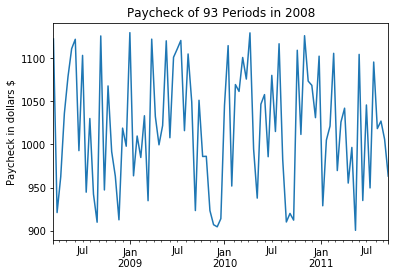

In [22]:
paycheck = pd.read_csv("paychecks.csv", squeeze=True, header=None)
paycheck.index = pd.date_range(start = '3/13/2008', periods = 93, freq = "2W-FRI")

paycheck.plot()
plt.ylabel("Paycheck in dollars $")
plt.title("Paycheck of 93 Periods in 2008")
plt.show()